In [1]:
#!/usr/bin/env conda run -n newenv1 python
import sys
print(sys.executable)

C:\ProgramData\Anaconda3_1\envs\newenv3\python.exe


Note: 
- the function matplotlib. import griddata is superseeded--> module 'matplotlib.mlab' has no attribute 'griddata'
- list of savepoint
    - 1) salvataggio con vecchie funzioni
    - 2) salvataggio pulito con l'indispensabile

In [2]:
import pandas as pd
import numpy as np
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import scipy.interpolate

In [3]:

df1 = pd.read_excel('TABIN/DATI_XYZ.xlsx')
points = df1.loc[:,['X','Y','Z']].to_numpy()
values = df1.loc[:,['classe']].to_numpy()



### ESEMPIO 1 LINEAR  (crea dei dati intemedi non realistici)

In [4]:
# creo l'instanza di interpolazione
linInter= LinearNDInterpolator(points, values)

#carico le coordinate di interpolazione
df2=pd.read_excel('TABIN/OUT_XYZ.xlsx')
array_pred = df2.loc[:,['X','Y','Z']].to_numpy()

# avvio la funzione di interpolazione
df2['data']=linInter(array_pred)
df2

,X,Y,Z,data
0,5,0,0,1.0
1,5,0,-1,1.0
2,5,0,-2,1.0
3,5,0,-3,2.5
4,5,0,-4,2.5
...,...,...,...,...
204,5,10,-14,1.0
205,5,10,-15,1.0
206,5,10,-16,1.0
207,5,10,-17,1.0


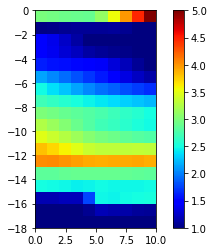

In [5]:
#Plotto i risultati
# creo meshgrid partendo da 3 array ad una dimensione (altrimenti dovrei gia avere Z in due dimensioni)

xi = np.linspace(0, 10, 10)
yi = np.linspace(0, -18, 18)
xi,yi=np.meshgrid(xi,yi)
X = df2.Y.to_numpy()    #1d array
Y = df2.Z.to_numpy()    #1d array
Z = df2.data.to_numpy() #1d array
#  Ho bisogno di interpolare perché 1D array non possono essere plottati come contour plot
rbf = scipy.interpolate.Rbf(X,Y,Z, function='linear')
zi=rbf(xi,yi)  #adesso zi ha la shape giusta
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(),origin='lower', 
           extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='jet')
plt.colorbar()

### ESEMPIO 2 GRIDDATA E NEIGHBOUR

In [6]:
#carico le coordinate di interpolazione
df2=pd.read_excel('TABIN/OUT_XYZ.xlsx')
array_pred = df2.loc[:,['X','Y','Z']].to_numpy()

# avvio la funzione di interpolazione
df2['data']=griddata(points, values, array_pred, method='nearest')
df2.tail(18)

,X,Y,Z,data
191,5,10,-1,1
192,5,10,-2,4
193,5,10,-3,4
194,5,10,-4,4
195,5,10,-5,4
196,5,10,-6,3
197,5,10,-7,2
198,5,10,-8,2
199,5,10,-9,2
200,5,10,-10,2


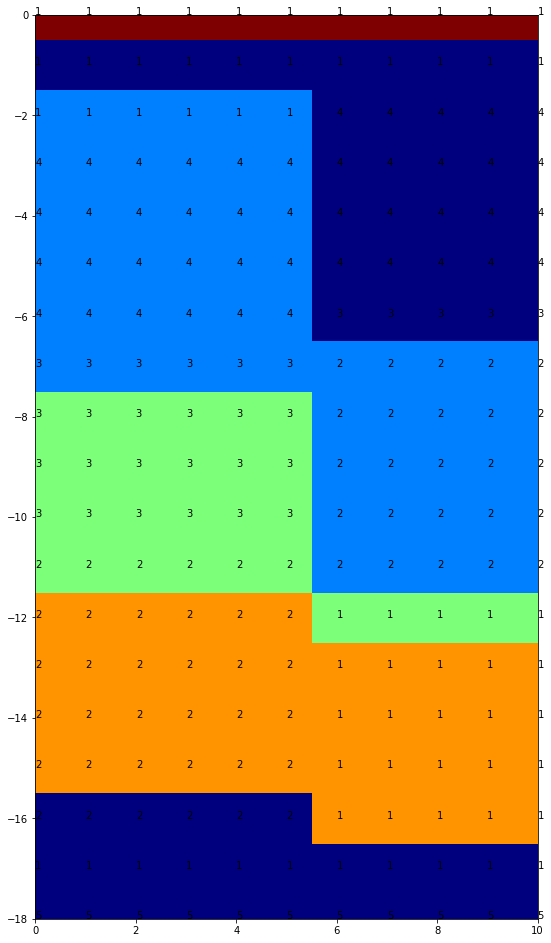

In [7]:
#Plotto i risultati
# creo meshgrid partendo da 3 array ad una dimensione (altrimenti dovrei gia avere Z in due dimensioni)

xi = np.linspace(0, 10, 20)
yi = np.linspace(0, -18, 36)

xi,yi=np.meshgrid(xi,yi)
X = df2.Y.to_numpy()    #1d array
Y = df2.Z.to_numpy()    #1d array
Z = df2.data.to_numpy() #1d array
#  Ho bisogno di interpolare perché 1D array non possono essere plottati come contour plot

zi=griddata((X,Y), Z, (xi,yi), method='nearest') # crea una lista 2D di dimensioni dimx,dimy

plt.figure(figsize=(9,18))

plt.imshow(zi, vmin=Z.min(), vmax=Z.max(),origin='lower', 
          extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='jet')

for x,y,z in zip(X,Y,Z):    
    label = "{:.0f}".format(z)
    plt.annotate(label, (x,y))
    
# nel plot non si vede ma le classi zi sono corrette e coinbaciano con 

In [10]:
zi

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3,